In [1]:
#Import data manupilation 
import pandas as pd
import numpy as np
#Import data visualization  libraries 
import seaborn  as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings( 'ignore' )

#import logging
import logging
logging.basicConfig (level=logging.INFO,
                    format = ' %(asctime)s - %(levelname)s - %(message)s' ,
                    filemode ='w',
                    filename = 'model.log',force =True)
#import Sci-kitlearn libraries  for model bulding
from sklearn.preprocessing  import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
# importing metrics for regression model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('Import Dataset For  Model Building..')

In [3]:
url = 'https://raw.githubusercontent.com/harshthorve284/CementPrediction_Model/refs/heads/main/Concrete_Data%20(2).csv'

df=pd.read_csv(url)
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
532,289.0,0.0,0.0,192.0,0.0,913.2,895.3,90,32.07
203,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,100,40.57
89,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3,39.30
732,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,7,9.01
147,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56,55.20
...,...,...,...,...,...,...,...,...,...
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
185,222.4,0.0,96.7,189.3,4.5,967.1,870.3,14,24.45
538,480.0,0.0,0.0,192.0,0.0,936.2,712.2,7,34.57
416,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,3,15.61


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
import statsmodels.api as sm
#X INDEPENDENT COLUMN
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
#y DEPENDED COLUMN
y = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
X =sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Wed, 04 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:04:16   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
#checking desscriptive stats:eda
#univariate analysis
from collections import OrderedDict
stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile (0.25),
        'Q3':df[i].quantile (0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skweness':df[i].skew(),
        'Kurtosis':df[i].kurt()
        
    })
    stats.append(numerical_stats)
    # saving all orderdict dic into a dataframe : structured format
    report = pd.DataFrame(stats)

report
    

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skweness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [9]:
'''
Note :
1. positive kurtosis leptokurtic
2. Normal kurtosis misokurtic
3. Negative distribution paltikurtic
.....................................
1. positive skewness : mode <median <mean
2. noskewness (normally distribute): mean=median=mode
3.negative: mean<median<mode
'''

'\nNote :\n1. positive kurtosis leptokurtic\n2. Normal kurtosis misokurtic\n3. Negative distribution paltikurtic\n.....................................\n1. positive skewness : mode <median <mean\n2. noskewness (normally distribute): mean=median=mode\n3.negative: mean<median<mode\n'

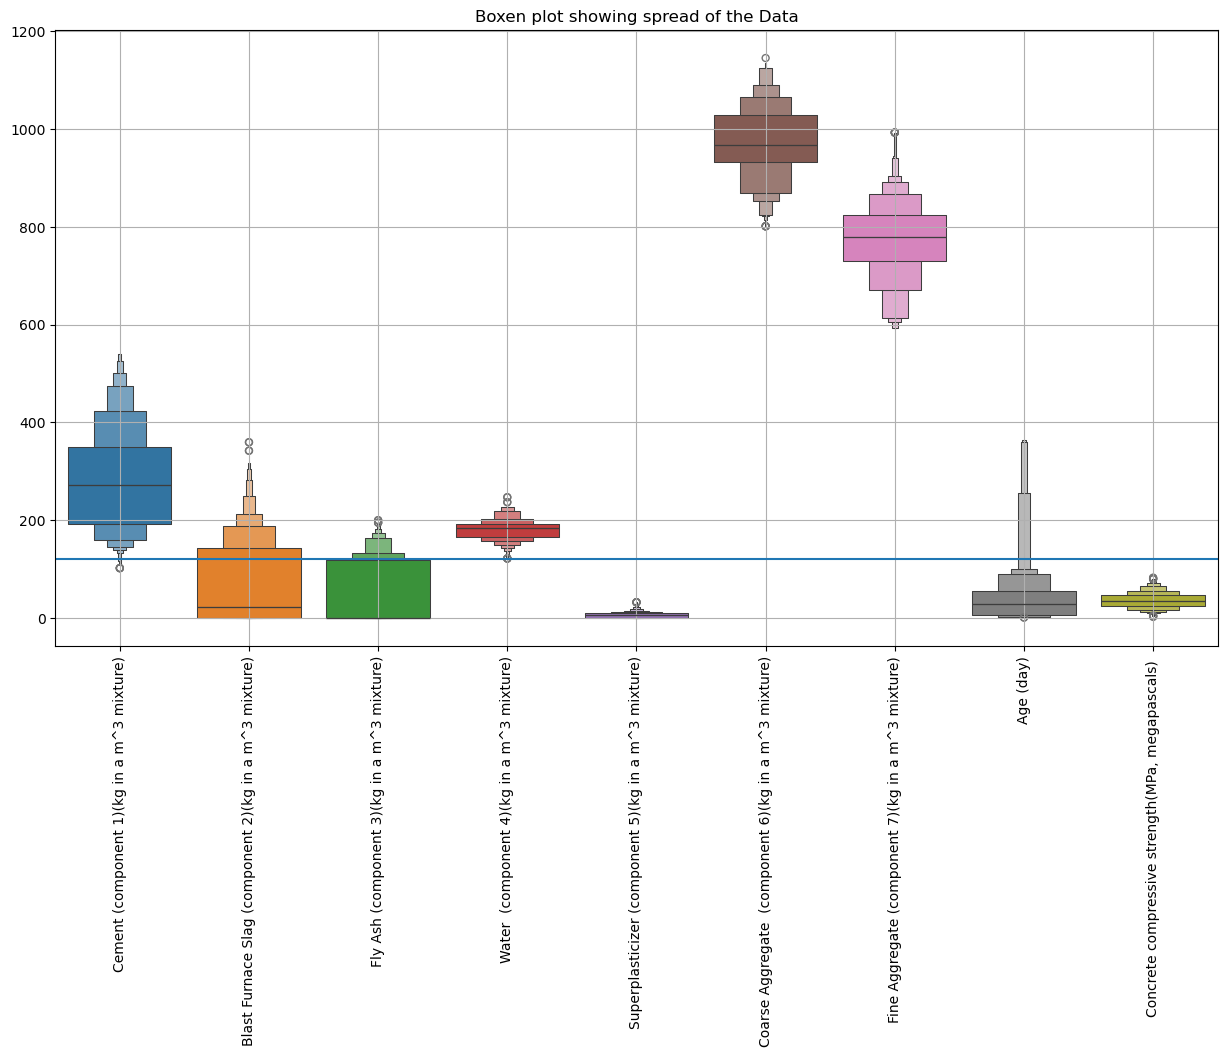

In [10]:
plt.figure(figsize = (15,8))
sns.boxenplot(df)
plt.title('Boxen plot showing spread of the Data')
plt.axhline(120)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap showing CorrealatiioCorrelation w,r,t Target Column ')

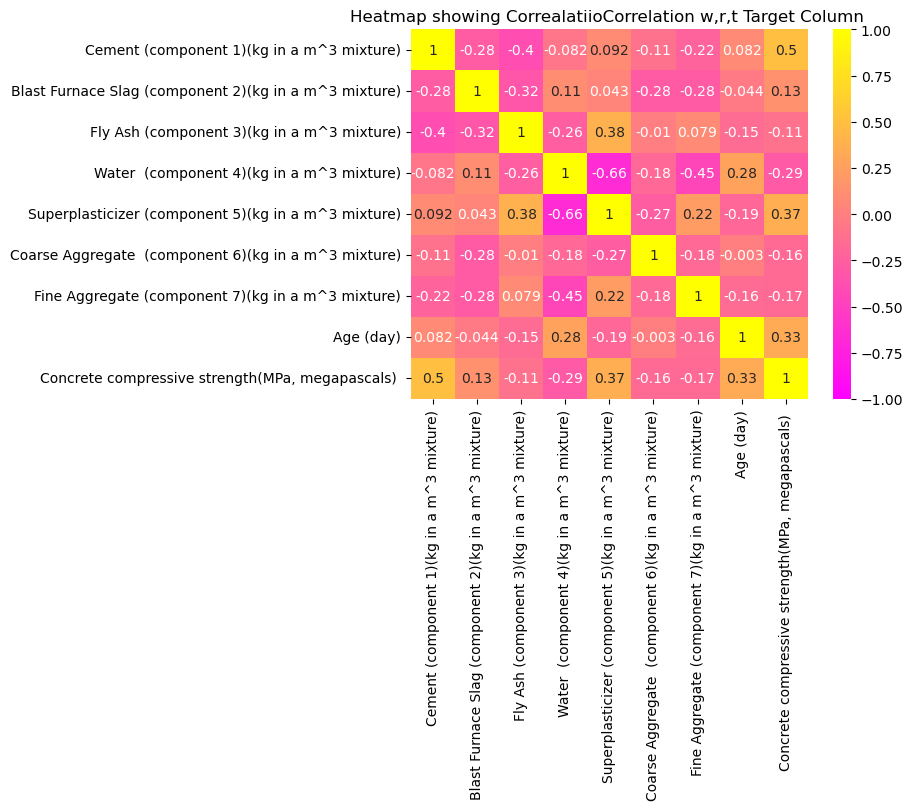

In [11]:
sns.heatmap(df.corr(),annot=True,center=0,vmax=1,vmin=-1,cmap='spring')
plt.title("Heatmap showing CorrealatiioCorrelation w,r,t Target Column ")

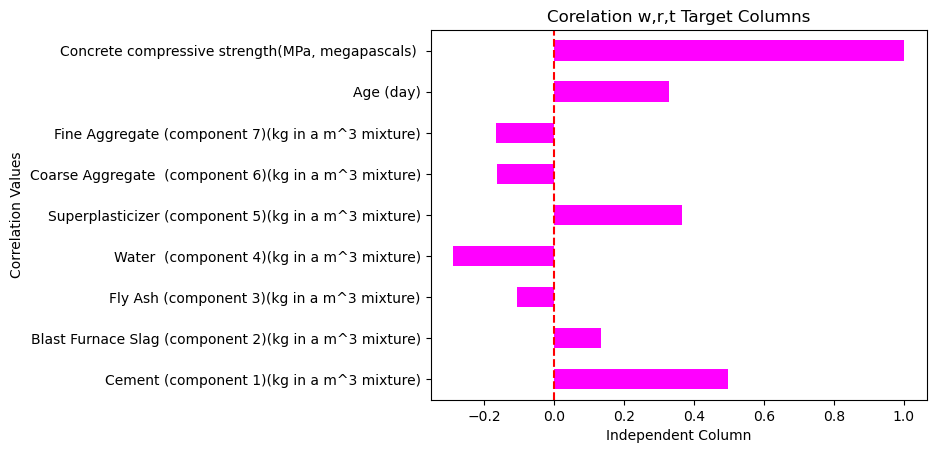

In [12]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind ='barh',cmap= 'spring')
plt.axvline(0,linestyle = '--' ,color = 'red')
plt.title('Corelation w,r,t Target Columns')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Column')
plt.show()

#MODEL BULDING 

In [14]:
#checking the top five values
'''
1.as the dataset contai no catagorical columns  no need of converting the categorical column to numberical
2.no missing  value present in given dataset
'''
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [15]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [16]:
#Preventing the data leakage
#step 1 : split the data set into X and y
# where X : independent column ,y : dependent :target column

X= df.drop(columns= 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y= df[ 'Concrete compressive strength(MPa, megapascals) ']


In [17]:
# step 2: using train test split
#test_size lies between 0.20 and 0.35
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.30,random_state =42)
#step 3: using  scaling techinque
sc  = MinMaxScaler()
#Seen data
X_train = sc.fit_transform(X_train)
#unseen data
X_test = sc.transform(X_test)

In [18]:
X_train.max(),X_train.min()

(1.0000000000000002, 0.0)

In [19]:
#Linear Regression
from sklearn.linear_model import LinearRegression 
LR =LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy for linear Regression',r2_score(y_test,y_pred_LR))


Model Accuracy for linear Regression 0.5943782479239215


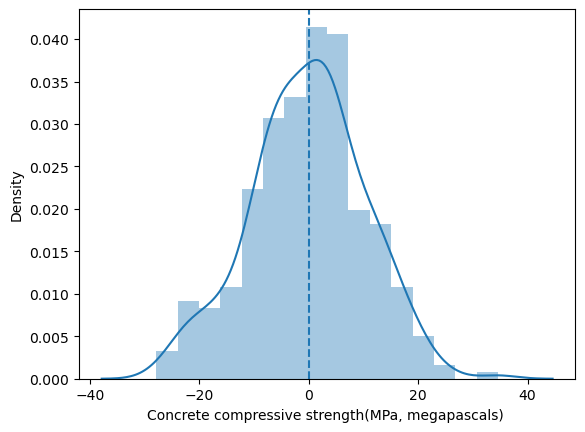

In [20]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle= '--')

Text(0, 0.5, 'Y_pred')

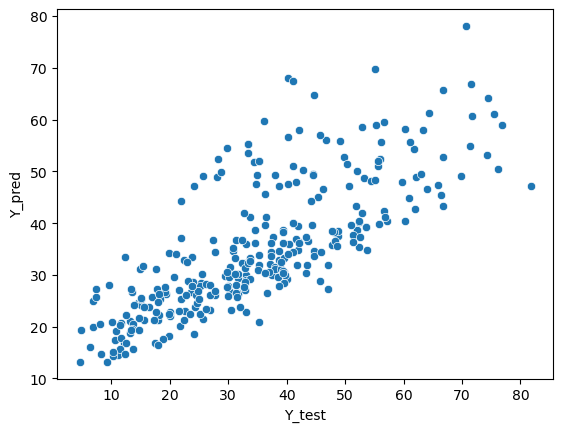

In [21]:
sns.scatterplot(x = y_test, y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

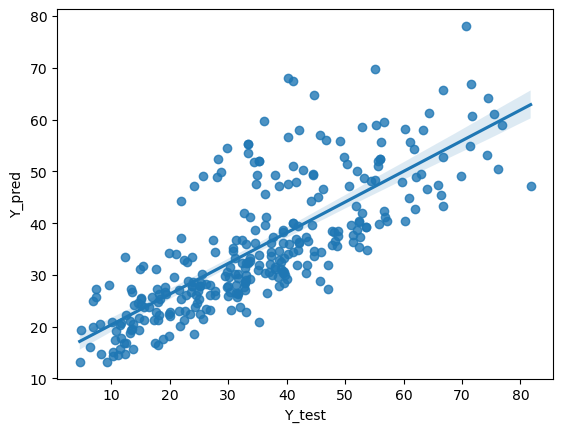

In [22]:
# model performance for LR
sns.regplot(x= y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [23]:
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [24]:
LR.intercept_

-13.61693264223748

In [25]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
print('THE MODEL ACCURACY FOR DECISON TREE REGRESSOR',r2_score(y_test,y_pred_DT))

THE MODEL ACCURACY FOR DECISON TREE REGRESSOR 0.8100236471211977


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

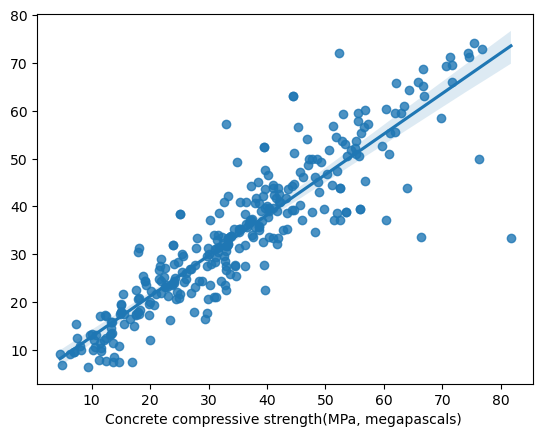

In [26]:
sns.regplot(x =y_test, y= y_pred_DT)

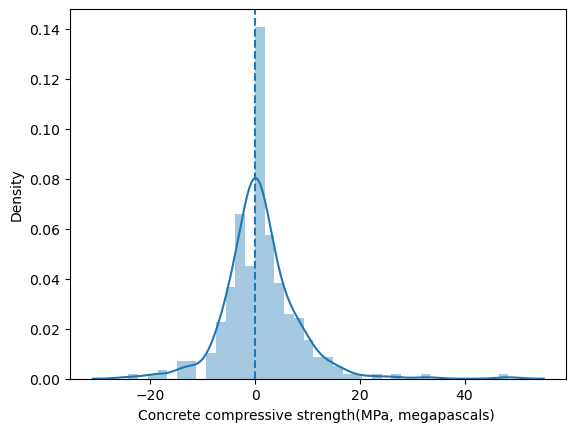

In [27]:
sns.distplot(y_test - y_pred_DT)
plt.axvline(0,linestyle='--')

In [28]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print('Model accuraccuracy for random forat is',r2_score(y_test,y_pred_RF))


Model accuraccuracy for random forat is 0.8849065645435695


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

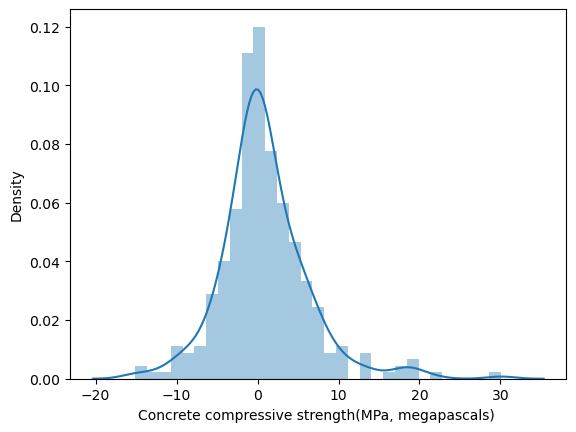

In [29]:
sns.distplot(y_test-y_pred_RF)

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

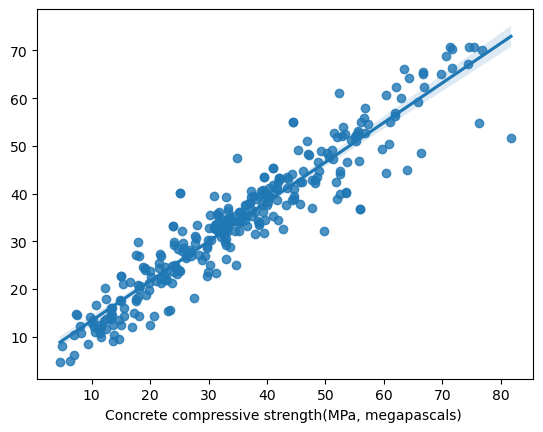

In [30]:

#model performance 
sns.regplot(x =y_test,y=y_pred_RF)


In [53]:
RF.feature_importances_

array([0.31796783, 0.07251883, 0.02050469, 0.11912642, 0.07041239,
       0.02848961, 0.03758072, 0.33339951])

In [66]:
feature_name = X.columns
importance_df=pd.Series(Feature,index=feature_name)
importance_df

NameError: name 'Feature' is not defined

In [64]:
# using xgboost 
import xgboost as xg
xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('the model accury  for xgboost regressor ',r2_score(y_test,y_pred_xgb))


the model accury  for xgboost regressor  0.9104444067517969


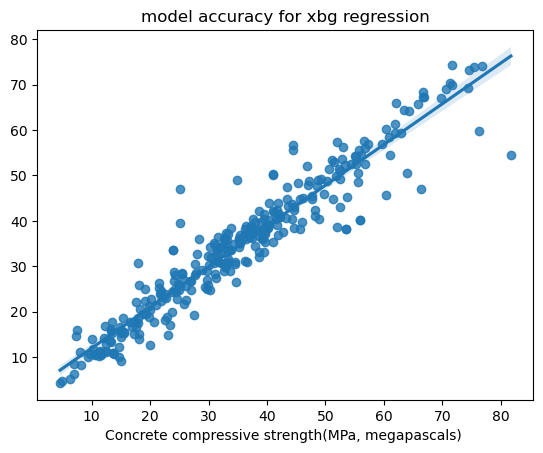

In [68]:
# model performance  for xgb
sns.regplot(x=y_test,y=y_pred_xgb)
plt.title('model accuracy for xbg regression')
plt.show()
          

In [80]:
#model adaboost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
print('Model accuraccuracy for random forat is',r2_score(y_test,y_pred_ada))



Model accuraccuracy for random forat is 0.7769204298714264


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GBR= GBR.predict(X_test)
print('Model accuraccuracy for gradient boost regressor is',r2_score(y_test,y_pred_GBR))


Model accuraccuracy for gradient boost regressor is 0.891348945867315


In [92]:
#KNN alghoralgorithm
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNN=KNN.predict(X_test)
print('Model accuraccuracy for KNN regressor is',r2_score(y_test,y_pred_KNN))


Model accuraccuracy for KNN regressor is 0.6457281524418169
